# ECE 285 - MLIP -Assignment 1 - Backpropagation

## Getting Started

In [1]:
import numpy as np
import copy
from matplotlib import pyplot

## Read MNIST Data

In [2]:
import MNISTtools

#### 1. Using MNISTtools.load, store the images and labels from the training datasets into two variables, respectively, xtrain and ltrain. What are the shapes of both variables? What is the size of the training dataset? What is the feature dimension?

In [3]:
xtrain, ltrain = MNISTtools.load(dataset = "training", path = "/datasets/MNIST")
print(xtrain.shape)
print(ltrain.shape)

(784, 60000)
(60000,)


#### The shape of xtrain is 784*60000;
#### The shape of ltrain is 60000*1;
#### The size of training dataset is 60000;
#### The feature dimension is 784



#### 2. Display the image of index 42 and check that its content corresponds to its label.

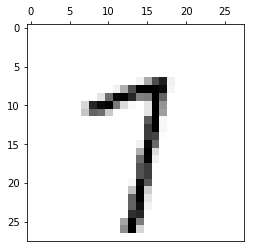

7


In [4]:
MNISTtools.show(xtrain[:,42])
print(ltrain[42])

#### The content of image with index 42 is corresponding to its label which is 7

#### 3. What is the range of xtrain (minimum and maximum values)? What is the type of xtrain?

In [13]:
print(np.min(xtrain))
print(np.max(xtrain))
print(type(xtrain))
print(xtrain.dtype)

0
255
<class 'numpy.ndarray'>
uint8


#### 4. Create a function 

In [14]:
def normalize_MNIST_images(x):
    return ((x - 127.5)/127.5).astype(np.float32)

#### 5 Using integer array indexing, complete the following function

In [15]:
def label2onehot(lbl):
    d = np.zeros((lbl.max() + 1, lbl.size))
    d[lbl, np.arange(lbl.size)] = 1
    return d
dtrain = label2onehot(ltrain)

print(dtrain.shape)
print(dtrain[:,42])
print(ltrain[42])

(10, 60000)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


In [16]:
print(ltrain)

[5 0 4 ... 5 6 8]


In [17]:
print(dtrain)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


#### 6. Complete the following function

In [18]:
def onehot2label(d):
    lbl = d.argmax(axis = 0)  # 0 represents columns, 1 represents rows
    # numpy.argmax(axis = 0 or 1) returns the index of the maximum for certain column or row
    return lbl

In [19]:
print(all(ltrain == onehot2label(dtrain)))

True


## Activation Functions

#### 7. 

In [20]:
def softmax(a):
    div = np.exp(a - a.max(axis = 0))
    return div / div.sum(axis = 0)

#### 8.

$$
\begin{align}
\frac{\partial g(a)_i}{\partial a_i} &= \frac{exp(a_i)*\sum_{j=1}^{10}  exp(a_j)-exp(a_i)^2}{\sum_{j = 1}^{10}exp(a_j)^2} \\
&= g(a)_i - (g(a)_i)^2 \\
&= g(a)_i(1 - g(a)_i) 
\end{align}$$

#### 9

$$
\begin{align}
\frac{\partial g(a)_i}{\partial a_j} &=
\frac {-exp(a_i)*exp(a_j)}{\sum_{j=1}^{10}exp(a_j)^2} \\
&= -g(a_i)*g(a)_j (i\neq j)
\end{align}$$

#### 10

In [21]:
def softmaxp(a, e):
    g = softmax(a)
    return g*e-(g*e).sum(axis=0)*g

#### 11

In [22]:
eps = 1e-6 # finite difference step
a = np.random.randn(10, 200) # random inputs
e = np.random.randn(10, 200) # random directions
diff = softmaxp(a, e)
diff_approx = (softmax(a+eps*e)-softmax(a))/eps
rel_error = np.abs(diff - diff_approx).mean() / np.abs(diff_approx).mean()
print(rel_error, 'should be smaller than 1e-6')

4.953000214778419e-07 should be smaller than 1e-6


#### 12 For the hidden layers, we will using $ReLU(a)_i = max(a_i,0).$Write two functions

In [23]:
def relu(a):
    a[(a < 0)] = 0
    a[0] = 0
    return a
def relup(a, e):
    ret_a = np.zeros(a.shape)
    ret_a[(a> 0)] = 1
    return ret_a * e

## Backpropagation

#### 13 Use the following function to create/initialize your shallow network as follows

In [24]:
def init_shallow(Ni, Nh, No):
    b1 = np.random.randn(Nh, 1) / np.sqrt((Ni+1.)/2.)
    W1 = np.random.randn(Nh, Ni) / np.sqrt((Ni+1.)/2.)
    b2 = np.random.randn(No, 1) / np.sqrt((Nh+1.))
    W2 = np.random.randn(No, Nh) / np.sqrt((Nh+1.))
    return W1, b1, W2, b2

In [25]:
Ni = xtrain.shape[0]
Nh = 64
No = dtrain.shape[0]
netinit = init_shallow(Ni, Nh, No)
saved_init_net = copy.deepcopy(netinit)

#### 14 Complete the function forwardprop_shallow to evaluate the prediction of our initial network

In [26]:
def forwardprop_shallow(x, net):
    W1 = net[0]
    b1 = net[1]
    W2 = net[2]
    b2 = net[3]
    a1 = W1.dot(x) + b1
    h1 = relu(a1)
    a2 = W2.dot(h1) + b2
    y = softmax(a2)
    return y

xtrain = normalize_MNIST_images(xtrain)
yinit = forwardprop_shallow(xtrain, netinit)

#### 15 Complete the function eval_loss

In [27]:
def eval_loss(y, d):
    y = np.log(y)
    return -np.sum(d*y) / d.size
    
print(eval_loss(yinit,dtrain),'should be around .26')

0.25985330248829275 should be around .26


In [28]:
print(yinit)

[[0.1559004  0.16872822 0.04224353 ... 0.17993854 0.13240556 0.11999424]
 [0.04746604 0.0509615  0.04272257 ... 0.06013684 0.03949688 0.12424358]
 [0.03298208 0.04016292 0.05336364 ... 0.05245161 0.0390839  0.04730759]
 ...
 [0.12266958 0.1342491  0.06788984 ... 0.13541795 0.14171889 0.09457247]
 [0.04847042 0.0449802  0.03249639 ... 0.04746145 0.03817322 0.05285681]
 [0.39804475 0.28281255 0.23058769 ... 0.27948465 0.32690785 0.31942444]]


#### 16 Complete the function eval_perfs

In [29]:
def eval_perfs(y, lbl):
    matrix = np.ones(lbl.shape)
    matrix[onehot2label(y) - lbl == 0] = 0
    return np.sum(matrix)*1.0/len(lbl)
print(eval_perfs(yinit, ltrain))

0.9050833333333334


#### 17 Complete the following function update_shallow

In [32]:
def update_shallow(x, d, net, gamma = .05):
    W1 = net[0]
    b1 = net[1]
    W2 = net[2]
    b2 = net[3]
    Ni = W1.shape[1]
    Nh = W1.shape[0]
    No = W2.shape[0]
    
    gamma = gamma / x.shape[1] # normalized by the training dataset size
    # forward process
    a1 = W1.dot(x) + b1
    h1 = relu(a1)
    a2 = W2.dot(h1) + b2
    y = softmax(a2)
    
    e = -d/y
    d2 = softmaxp(a2, e)
    d1 = relup(a1, W2.T.dot(d2))
    # Gradient descent
    W2 = W2 - gamma*d2.dot(h1.T)
    W1 = W1 - gamma*d1.dot(x.T)
    b2 = b2 - gamma*d2.sum(axis = 1).reshape(No,1)
    b1 = b1 - gamma*d1.sum(axis = 1).reshape(Nh,1)
    
    return W1, b1, W2, b2

#### 18 Using update_shallow, complete the function backprop_shallow

In [33]:
def backprop_shallow(x, d, net, T, gamma = 0.05):
    lbl = onehot2label(d)
    for t in range(T):
        net = update_shallow(x, d, net, gamma)
        if (t % 1 == 0):
            ypred = forwardprop_shallow(x, net)
            loss = eval_loss(ypred, d)
            acc = eval_perfs(ypred, lbl)
            print("step="+str(t)+" loss= "+str(loss)+" error_rate= "+str(acc))
    return net
netinit = init_shallow(Ni, Nh, No)
nettrain = backprop_shallow(xtrain, dtrain, netinit, T = 2)

step=0 loss= 0.24538052976217384 error_rate= 0.90655
step=1 loss= 0.21962441164441934 error_rate= 0.8164666666666667


In [34]:
def backprop_shallow(x, d, net, T, gamma = 0.05):
    lbl = onehot2label(d)
    for t in range(T):
        net = update_shallow(x, d, net, gamma)
        if (t % 1 == 0):
            ypred = forwardprop_shallow(x, net)
            loss = eval_loss(ypred, d)
            acc = eval_perfs(ypred, lbl)
            print("step="+str(t)+" loss= "+str(loss)+" error_rate= "+str(acc))
    return net
netinit = init_shallow(Ni, Nh, No)
nettrain = backprop_shallow(xtrain, dtrain, netinit, T = 5)

step=0 loss= 0.24581866846239078 error_rate= 0.9039333333333334
step=1 loss= 0.22934417107539315 error_rate= 0.7976666666666666
step=2 loss= 0.21526223779383463 error_rate= 0.7977166666666666
step=3 loss= 0.206345820186148 error_rate= 0.6813666666666667
step=4 loss= 0.19829943509572132 error_rate= 0.6366833333333334


In [35]:
def backprop_shallow(x, d, net, T, gamma = 0.05):
    lbl = onehot2label(d)
    for t in range(T):
        net = update_shallow(x, d, net, gamma)
        if (t % 2 == 0):
            ypred = forwardprop_shallow(x, net)
            loss = eval_loss(ypred, d)
            acc = eval_perfs(ypred, lbl)
            print("step="+str(t)+" loss= "+str(loss)+" error_rate= "+str(acc))
    return net
netinit = init_shallow(Ni, Nh, No)
nettrain = backprop_shallow(xtrain, dtrain, netinit, T = 20)

step=0 loss= 0.24341092534876146 error_rate= 0.8878833333333334
step=2 loss= 0.20811322637833207 error_rate= 0.7292166666666666
step=4 loss= 0.19343459410366823 error_rate= 0.6218166666666667
step=6 loss= 0.1802421581389252 error_rate= 0.53035
step=8 loss= 0.1677035273476112 error_rate= 0.4597833333333333
step=10 loss= 0.15602479692988838 error_rate= 0.40495
step=12 loss= 0.14536584496603014 error_rate= 0.3662
step=14 loss= 0.135734278669354 error_rate= 0.33448333333333335
step=16 loss= 0.1271009085336038 error_rate= 0.3097
step=18 loss= 0.11939161389285223 error_rate= 0.29035


In [36]:
def backprop_shallow(x, d, net, T, gamma = 0.05):
    lbl = onehot2label(d)
    for t in range(T):
        net = update_shallow(x, d, net, gamma)
        if (t % 10 == 0):
            ypred = forwardprop_shallow(x, net)
            loss = eval_loss(ypred, d)
            acc = eval_perfs(ypred, lbl)
            print("step="+str(t)+" loss= "+str(loss)+" error_rate= "+str(acc))
    return net

In [37]:
netinit = init_shallow(Ni, Nh, No)
nettrain = backprop_shallow(xtrain, dtrain, netinit, T = 101)

step=0 loss= 0.22629537418267046 error_rate= 0.8213833333333334
step=10 loss= 0.16152120497819006 error_rate= 0.43771666666666664
step=20 loss= 0.11813313965266975 error_rate= 0.30701666666666666
step=30 loss= 0.09920943231250402 error_rate= 0.27
step=40 loss= 0.08243735291759938 error_rate= 0.22191666666666668
step=50 loss= 0.07254176574539453 error_rate= 0.19595
step=60 loss= 0.0653521134364137 error_rate= 0.17491666666666666
step=70 loss= 0.060159801310028224 error_rate= 0.16141666666666668
step=80 loss= 0.05596531220195758 error_rate= 0.14968333333333333
step=90 loss= 0.052708483998101 error_rate= 0.14155
step=100 loss= 0.05019050723257061 error_rate= 0.13621666666666668


#### 19 Load the testing dataset into two variables xtest and ltest. What is the size of the testing set? Evaluate the performance of your network on the testing dataset.

In [38]:
xtest,ltest = MNISTtools.load(dataset = "testing", path = "/datasets/MNIST")
xtest = normalize_MNIST_images(xtest)
dtest = label2onehot(ltest)
print(xtest.shape)
print(ltest.shape)

(784, 10000)
(10000,)


In [39]:
ypred = forwardprop_shallow(xtest, nettrain)
loss = eval_loss(ypred,dtest)
acc = eval_perfs(ypred,ltest)
print("Test Set:")
print("loss= "+str(loss)+" error_rate= "+str(acc))

Test Set:
loss= 0.048366963406012965 error_rate= 0.1318


#### 20 Using update_shallow, interpret each instruction and complete the function backprop_minibatch_shallow

In [40]:
def backprop_minibatch_shallow(x, d, net, T, B=100, gamma=.05):
    N = x.shape[1]
    NB = int((N+B-1)/B)
    lbl = onehot2label(d)
    for t in range(0, T):
        shuffled_indices = np.random.permutation(range(N))
        for l in range(0, NB):
            #index = np.arange(B*l, min(B*(l+1), N))
            index = shuffled_indices[B*l:min(B*(l+1),N)]
            net = update_shallow(x[:,index],d[:,index],net,gamma)
        y = forwardprop_shallow(x, net)
        loss = eval_loss(y,d)
        acc = eval_perfs(y,lbl)
        print("epoch= "+str(t)+" loss= "+str(loss)+" error_rate= "+str(acc))
    return net

#### 21 Run backprop_minibatch_shallow for 5 epochs. Compare the performance of this new network on the testing dataset

In [41]:
Ni = xtrain.shape[0]
Nh = 64
No = dtrain.shape[0]
netinit_minibatch = init_shallow(Ni, Nh, No)
netminibatch = backprop_minibatch_shallow(xtrain, dtrain, netinit_minibatch, 5, B=100)

epoch= 0 loss= 0.02929680325229088 error_rate= 0.08556666666666667
epoch= 1 loss= 0.023077029228314182 error_rate= 0.0672
epoch= 2 loss= 0.019282495350412415 error_rate= 0.055016666666666665
epoch= 3 loss= 0.01679772367956063 error_rate= 0.04928333333333333
epoch= 4 loss= 0.01458215823822353 error_rate= 0.042633333333333336


In [42]:
ypred = forwardprop_shallow(xtest, netminibatch)
loss = eval_loss(ypred,dtest)
acc = eval_perfs(ypred, ltest)
print("Test Set:")
print("loss= "+str(loss)+" error_rate= "+str(acc))

Test Set:
loss= 0.014902326272132015 error_rate= 0.0444


Compared with non-minibatched method, minibatch is faster and with much lower error.